In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from preprocessing import VCF, load_suffixes, prepare_input
from recalibrator import Recalibrator


## Loading a model & recalibrating

Trio: Kr_


/home/boi/research/ML-maternal-cell-contamination/python/preprocessing.py:192: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


Total positions: 94710
Recalibrated positions: 3162
3.34 % recalibrated


/usr/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


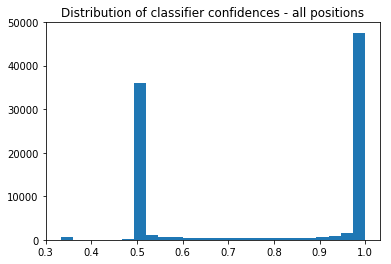

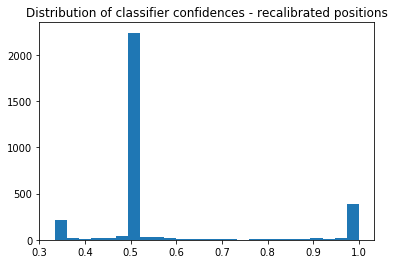

Trio: 6
Total positions: 77801
Recalibrated positions: 11734
15.1 % recalibrated


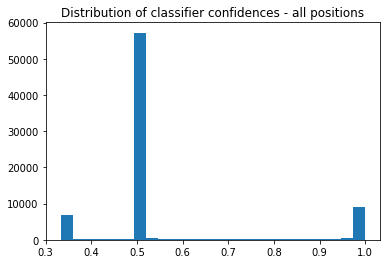

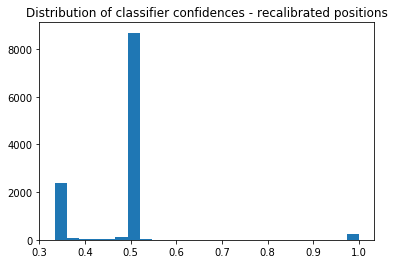

Trio: 15_
Total positions: 97120
Recalibrated positions: 1440
1.48 % recalibrated


/usr/lib/python3.6/site-packages/sklearn/linear_model/base.py:347: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


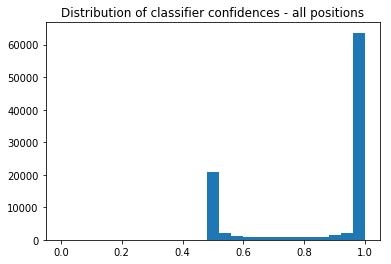

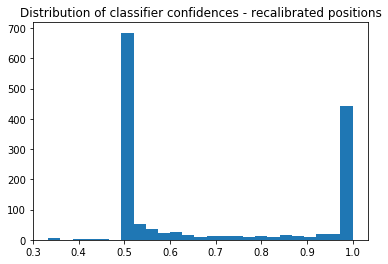

In [2]:
r = Recalibrator()
r.load("model.pickle")

abortus_paths = ["../data/Kr.hg19.gencode27withflank50.vcf","../data/6.gencode27withflank50.vcf", "../data/15.gencode27withflank50.vcf"]
prefixes = ["Kr_", "6", "15_"]
contaminations = [0.056453796594019945, 0.04120035307396641, 0.04163949937119704]

for abortus_path, prefix, contamination in zip(abortus_paths, prefixes, contaminations): 
    print("Trio: "+ prefix)
    abortus = VCF(abortus_path)
    abortus.process(contamination, prefix + "mo", prefix + "fa", prefix +"ab")
    preds_lr = r.predict_lr(abortus.prepare_input())
    recalibrated = preds_lr != abortus.df_processed[prefix+ 'ab^GT']
    
    total_pos = preds_lr.shape[0]
    recal_pos = np.sum(recalibrated)
    print("Total positions: {}".format(total_pos))
    print("Recalibrated positions: {}".format(recal_pos))
    print("{0:.3g} % recalibrated".format(recal_pos/total_pos*100))
    
    probs = r.model_lr.predict_proba(abortus.prepare_input()).max(axis = 1)
    probs[np.isnan(probs)] = 0
    plt.figure()
    plt.hist(probs, bins=25)
    plt.title("Distribution of classifier confidences - all positions")
    plt.figure()
    plt.hist(probs[recalibrated], bins=25)
    plt.title("Distribution of classifier confidences - recalibrated positions")
    plt.show()
    